In [24]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

# 시각화 한글 폰트 설정
# 윈도우 사용자
#plt.rc('font', family='Malgun Gothic')

# Mac 사용자
plt.rc('font', family='AppleGothic')

# 마이너스 기호 출력
plt.rc('axes', unicode_minus=False)

import warnings
warnings.filterwarnings('ignore')

# 데이터 로드

In [4]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
bts = pd.read_csv('data/bus_bts.csv')
jeju_life = pd.read_csv('data/jeju_financial_life_data.csv')
weather = pd.read_csv('data/weather.csv', encoding='cp949')
rain = pd.read_csv('data/rain.csv', encoding='utf-8')

In [7]:
train.head()

,id,date,bus_route_id,in_out,station_code,station_name,latitude,longitude,6~7_ride,7~8_ride,...,9~10_ride,10~11_ride,11~12_ride,6~7_takeoff,7~8_takeoff,8~9_takeoff,9~10_takeoff,10~11_takeoff,11~12_takeoff,18~20_ride
0,0,2019-09-01,4270000,시외,344,제주썬호텔,33.48990,126.49373,0.0,1.0,...,5.0,2.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,2019-09-01,4270000,시외,357,한라병원,33.48944,126.48508,1.0,4.0,...,2.0,5.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
2,2,2019-09-01,4270000,시외,432,정존마을,33.48181,126.47352,1.0,1.0,...,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
3,3,2019-09-01,4270000,시내,1579,제주국제공항(600번),33.50577,126.49252,0.0,17.0,...,26.0,14.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,53.0
4,4,2019-09-01,4270000,시내,1646,중문관광단지입구,33.25579,126.41260,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [8]:
bts.head()

,user_card_id,bus_route_id,vhc_id,geton_date,geton_time,geton_station_code,geton_station_name,getoff_date,getoff_time,getoff_station_code,getoff_station_name,user_category,user_count
0,1.010010e+15,23000000,149793674,2019-09-10,06:34:45,360,노형오거리,2019-09-10,07:10:31,592.0,화북초등학교,1,1
1,1.010010e+15,23000000,149793674,2019-09-10,06:34:58,360,노형오거리,2019-09-10,06:56:27,3273.0,고산동산(광양방면),1,1
2,1.019160e+15,21420000,149793535,2019-09-10,07:19:07,2495,동광환승정류장4(제주방면),2019-09-10,07:40:29,431.0,정존마을,4,1
3,1.019150e+15,21420000,149793512,2019-09-09,09:14:47,3282,대정환승정류장(대정읍사무소),2019-09-09,10:02:46,431.0,정존마을,1,1
4,1.010010e+15,21420000,149793512,2019-09-09,09:28:53,2820,삼정지에듀,2019-09-09,10:21:37,2972.0,제주국제공항(종점),4,1


In [9]:
jeju_life.head()

,zip_cd,year_month,x_axis,y_axis,sex,age,job_majorc,job_smallc,job_public,job_profession,...,avg_debt,avg_debt_credit,avg_debt_noneb,avg_debt_mortgage,avg_debt_deposit,avg_debt_collateral,avg_credit_rat,medium_resid_rat,large_resid_rat,vehicle_own_rat
0,63299,201902,126.565889,33.513210,1,54,0.0,0.166667,0.000000,0.000000,...,24285196,11419148,8863595,55550000,0,55550000,5,-999999.0,-999999.0,0.000000
1,63560,201902,126.497121,33.247225,1,59,0.0,0.125000,0.000000,0.000000,...,108571077,25896955,13317443,0,200000000,74421721,4,-999999.0,-999999.0,0.000000
2,63560,201902,126.497121,33.247225,2,49,0.0,0.250000,0.000000,0.000000,...,26424335,12015311,12015311,40833359,0,40833359,2,-999999.0,-999999.0,0.000000
3,63560,201902,126.497121,33.247225,1,54,0.0,0.181818,0.090909,0.090909,...,647716901,39952556,21558153,36697792,0,706300496,4,-999999.0,-999999.0,0.166667
4,63560,201902,126.497121,33.247225,1,49,0.0,0.250000,0.000000,0.000000,...,248232725,35712501,5568751,0,0,626810674,5,-999999.0,-999999.0,0.000000


In [10]:
weather.head()

,날짜,현재일기,현재기온,체감온도,일강수
0,2019-09-01,흐림,26.2,75.0,0
1,2019-09-02,비 끝남,22.5,72.0,25.7
2,2019-09-03,흐림,25.4,77.0,12.1
3,2019-09-04,약한비단속,24.2,75.0,34.3
4,2019-09-05,구름많음,27.6,79.0,0.1


In [11]:
rain.head()

,지점,일시,기온(°C),강수량(mm)
0,gosan,2019-09-01,23.916667,0.00
1,gosan,2019-09-02,23.700000,12.10
2,gosan,2019-09-03,23.550000,1.90
3,gosan,2019-09-04,23.533333,12.84
4,gosan,2019-09-05,26.033333,0.00


# 데이터 시각화를 통한 EDA

In [16]:
train_data = train.copy()

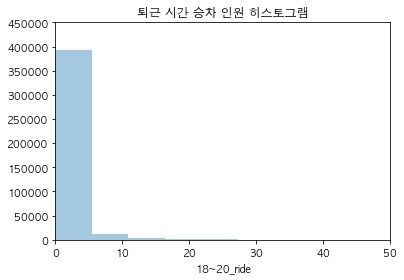

In [25]:
# 퇴근시간 승차인원 분포 시각화
sns.distplot(train_data['18~20_ride'], kde=False, bins=50)
plt.axis([0, 50, 0, 450000])
plt.title("퇴근 시간 승차 인원 히스토그램")
plt.show()

- 대부분의 값이 0~5 사이에 존재하므로 이를 세분화한다.

In [30]:
train_data.groupby('18~20_ride').size().head(6)

18~20_ride
0.0    296528
1.0     44268
2.0     23752
3.0     13560
4.0      8630
5.0      5911
dtype: int64

- 학습 데이터 타깃 변수 값 절반 이상이 0이다.

## 단일 변수에 따른 타깃 변수의 변화

### 1. 요일에 따른 퇴근시간 평균 탑승객 수

In [36]:
# 요일 변수 생성, 날짜형으로 변환
train_data['date'] = pd.to_datetime(train_data['date'])
train_data['weekday'] = train_data['date'].dt.weekday_name

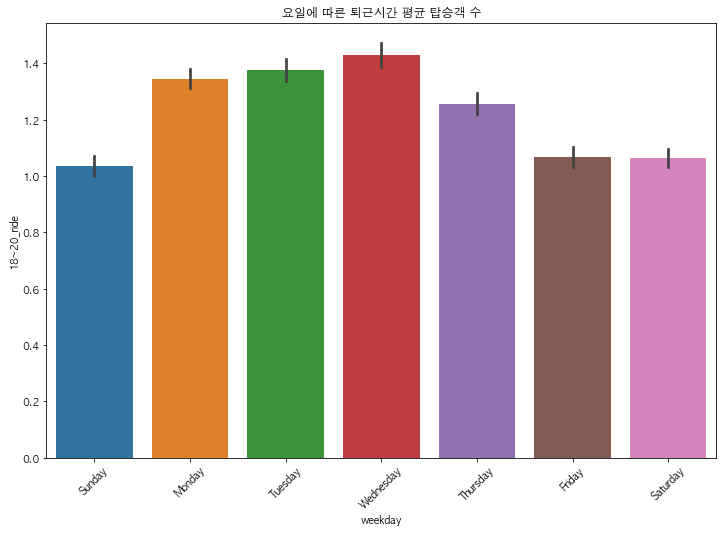

In [45]:
# 요일별 퇴근시간 평균 탑승객 수 시각화
plt.figure(figsize=(12,8))
sns.barplot(x='weekday', y='18~20_ride', data=train_data)
plt.title("요일에 따른 퇴근시간 평균 탑승객 수")
plt.xticks(rotation=45)
plt.show()

- 월요일부터 수요일까지 퇴근시간 승차인원이 증가하다가 이후 감소한다

### 2. 버스 종류에 따른 탑승객 수

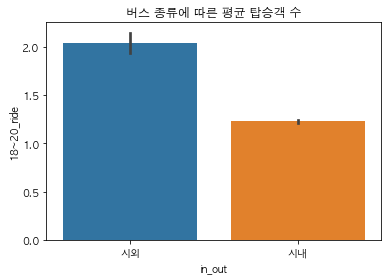

In [48]:
# 버스 종류별(시내/시외) 퇴근시간 평균 탑승객 수 시각화
sns.barplot(x='in_out', y='18~20_ride', data=train_data)
plt.title('버스 종류에 따른 평균 탑승객 수')
plt.show()

- 시외/시내 버스 종류에 따라 퇴근 시간에 버스를 이용하는 사람수에 차이가 있다.